In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load balanced dataset
df = pd.read_csv("/Users/sakshizanjad/Desktop/grocery_expiry_project/data/raw/merged_inventory.csv")

In [46]:
df.head()

,Product_ID,Product_Name,Category,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status,Expiry_Class
0,67-027-7269,Mushrooms,Fruits & Vegetables,50-050-5707,Twitterbeat,35,19,30,$6.50,2025-01-06,2024-11-30,2025-08-09,615 Mayer Drive,88,6.0,Backordered,Expired
1,22-083-3347,Long Grain Rice,Grains & Pulses,01-431-7544,Yodoo,69,82,58,$1.50,2024-07-07,2024-04-29,2025-07-12,38 Superior Road,34,22.0,Discontinued,Expired
2,21-013-3508,Cabbage,Fruits & Vegetables,64-489-8494,Meevee,12,95,49,$1.00,2024-06-09,2024-06-13,2025-07-09,84305 Fair Oaks Plaza,25,23.0,Backordered,Expired
3,15-240-6267,Eggplant,Fruits & Vegetables,12-983-3026,Mybuzz,91,55,94,$3.00,2024-03-11,2024-04-10,2025-07-02,25784 Old Gate Crossing,42,93.0,Active,Expired
4,70-871-4536,Swiss Cheese,Dairy,72-514-7323,Cogilith,29,4,17,$8.00,2025-01-19,2024-11-13,2025-03-16,5 Waxwing Junction,59,52.0,Active,Expired


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4470 entries, 0 to 4469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_ID               4470 non-null   object 
 1   Product_Name             4470 non-null   object 
 2   Category                 4467 non-null   object 
 3   Supplier_ID              4470 non-null   object 
 4   Supplier_Name            4470 non-null   object 
 5   Stock_Quantity           4470 non-null   int64  
 6   Reorder_Level            4470 non-null   int64  
 7   Reorder_Quantity         4470 non-null   int64  
 8   Unit_Price               4470 non-null   object 
 9   Date_Received            4470 non-null   object 
 10  Last_Order_Date          4470 non-null   object 
 11  Expiration_Date          4470 non-null   object 
 12  Warehouse_Location       4470 non-null   object 
 13  Sales_Volume             4470 non-null   int64  
 14  Inventory_Turnover_Rate 

In [48]:
df.isnull().sum()

Product_ID                 0
Product_Name               0
Category                   3
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
Expiry_Class               0
dtype: int64

In [49]:
df.columns

Index(['Product_ID', 'Product_Name', 'Category', 'Supplier_ID',
       'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity',
       'Unit_Price', 'Date_Received', 'Last_Order_Date', 'Expiration_Date',
       'Warehouse_Location', 'Sales_Volume', 'Inventory_Turnover_Rate',
       'Status', 'Expiry_Class'],
      dtype='object')

In [50]:
df.duplicated().sum()

0

In [51]:
# Unique counts
print("\nUnique Categories:", df['Catagory'].nunique() if 'Catagory' in df else df['Category'].nunique())
print("Unique Products:", df['Product_ID'].nunique())
print("Unique Suppliers:", df['Supplier_ID'].nunique())


Unique Categories: 7
Unique Products: 2490
Unique Suppliers: 2490


In [52]:
df.describe(include="all")

,Product_ID,Product_Name,Category,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status,Expiry_Class
count,4470,4470,4467,4470,4470,4470.000000,4470.000000,4470.000000,4470,4470,4470,4470,4470,4470.000000,4470.000000,4470,4470
unique,2490,213,7,2490,1788,NaN,NaN,NaN,1164,555,545,539,2490,NaN,NaN,3,3
top,67-027-7269,Bread Flour,Fruits & Vegetables,50-050-5707,Katz,NaN,NaN,NaN,$2.50,2024-11-05,2024-12-07,2025-09-12,615 Mayer Drive,NaN,NaN,Discontinued,Near_Expiry
freq,3,57,1282,3,36,NaN,NaN,NaN,297,31,28,99,3,NaN,NaN,1504,1990
mean,NaN,NaN,NaN,NaN,NaN,130.559284,51.771588,51.401790,NaN,NaN,NaN,NaN,NaN,124.519463,33.339889,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,150.081803,28.627162,29.125151,NaN,NaN,NaN,NaN,NaN,125.965297,33.321135,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,10.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,10.000000,0.010000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,43.000000,27.000000,26.000000,NaN,NaN,NaN,NaN,NaN,46.000000,0.077925,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,75.000000,53.000000,52.000000,NaN,NaN,NaN,NaN,NaN,73.000000,25.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,137.000000,77.000000,76.000000,NaN,NaN,NaN,NaN,NaN,129.000000,63.000000,NaN,NaN


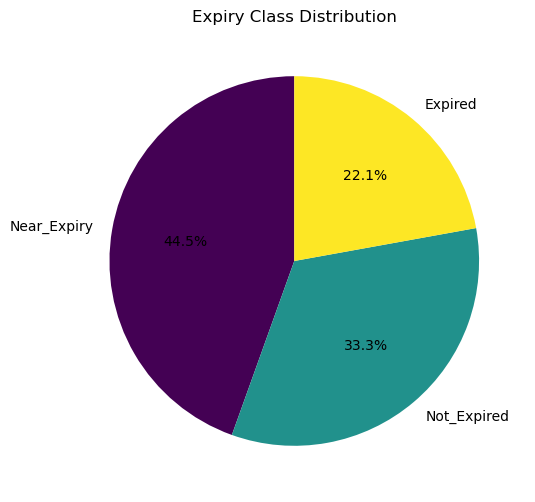

In [53]:
# Expiry Class Distribution
plt.figure(figsize=(6, 6))
df['Expiry_Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Expiry Class Distribution")
plt.ylabel("")
plt.show()

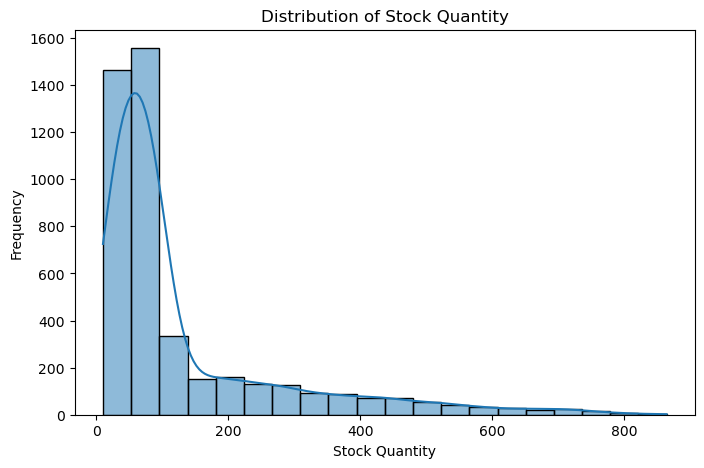

In [54]:
# Stock Quantity Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Stock_Quantity'], bins=20, kde=True)
plt.title("Distribution of Stock Quantity")
plt.xlabel("Stock Quantity")
plt.ylabel("Frequency")
plt.show()

In [55]:
print(df['Expiry_Class'].value_counts())

Expiry_Class
Near_Expiry    1990
Not_Expired    1490
Expired         990
Name: count, dtype: int64


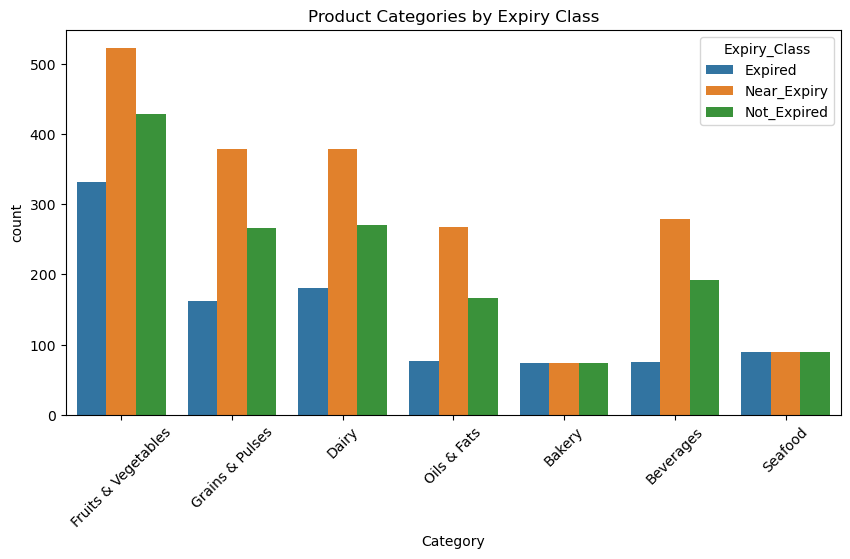

In [56]:
# Category Counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Catagory' if 'Catagory' in df else 'Category', hue="Expiry_Class")
plt.xticks(rotation=45)
plt.title("Product Categories by Expiry Class")
plt.show()

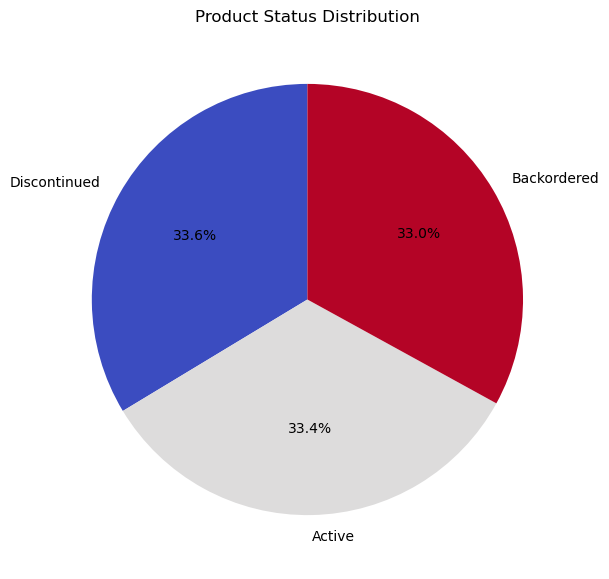

In [57]:
# Status Distribution
plt.figure(figsize=(7, 7))
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Product Status Distribution")
plt.ylabel("")
plt.show()

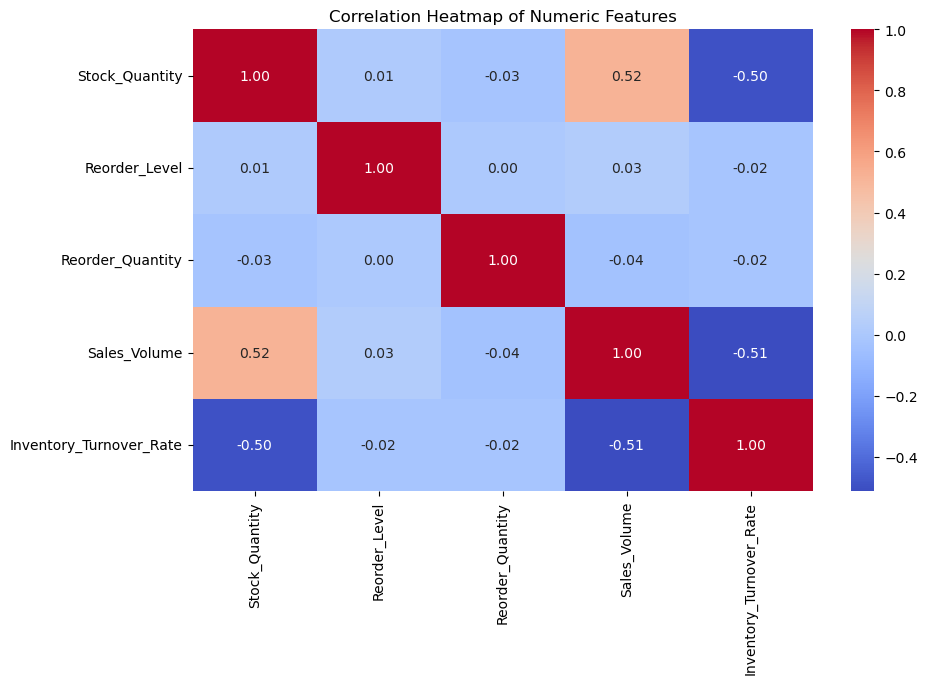

In [58]:
# Correlation Heatmap (only numeric cols)
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [59]:
df[df['Category'].isnull()]

,Product_ID,Product_Name,Category,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status,Expiry_Class
211,10-378-9729,Cabbage,NaN,83-941-9620,Rooxo,69,21,68,$66.55,2024-12-23,2024-11-26,2025-08-14,2 Butterfield Pass,36,35.0,Discontinued,Expired
1201,10-378-9729,Cabbage,NaN,83-941-9620,Rooxo,69,21,68,$66.55,2024-12-23,2024-11-26,2025-09-13,2 Butterfield Pass,36,35.0,Discontinued,Near_Expiry
2191,10-378-9729,Cabbage,NaN,83-941-9620,Rooxo,69,21,68,$66.55,2024-12-23,2024-11-26,2025-11-09,2 Butterfield Pass,36,35.0,Discontinued,Not_Expired


In [60]:
df['Category'].fillna('Fruits & Vegetables', inplace=True)

/var/folders/ls/sttsrb991n303dzf9kczqyjc0000gn/T/ipykernel_1577/1495867207.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna('Fruits & Vegetables', inplace=True)


In [61]:
df.isnull().sum()

Product_ID                 0
Product_Name               0
Category                   0
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
Expiry_Class               0
dtype: int64

In [62]:
import os
# Make sure folder exists
os.makedirs("data/processed", exist_ok=True)

# Save file
df.to_csv("/Users/sakshizanjad/Desktop/grocery_expiry_project/data/processed/intermediate.csv", index=False)